In [1]:
suppressPackageStartupMessages(suppressWarnings(library(ggplot2)))
suppressPackageStartupMessages(suppressWarnings(library(dplyr)))
suppressPackageStartupMessages(suppressWarnings(library(argparse)))

In [2]:
data_mode <- "terminal"

In [3]:
# set paths 
umap_file_path <- file.path("../../data/umap/",paste0(data_mode,"_umap_transformed.parquet"))
umap_file_path <- normalizePath(umap_file_path)
figures_path <- file.path(paste0("../figures/",data_mode,"/"))
if (!dir.exists(figures_path)) {
  dir.create(figures_path)
}

umap_df <- arrow::read_parquet(umap_file_path)


In [4]:
# add nM to the dose column
umap_df$Metadata_dose <- paste0(umap_df$Metadata_dose, " nM")
# make the dose a factor with levels
umap_df$Metadata_dose <- factor(umap_df$Metadata_dose, levels = c(
    "0 nM",
    "0.61 nM",
    "1.22 nM",
    "2.44 nM",
    "4.88 nM",
    "9.77 nM",
    "19.53 nM",
    "39.06 nM",
    "78.13 nM",
    "156.25 nM"
    )
    )



## Select only some of the doeses

In [5]:
color_pallete_for_dose <- c(
    "0 nM" = "#85FF33",
    "0.61 nM" = "#75FF1A",
    "1.22 nM" = "#62FF00",
    "2.44 nM" = "#4DC507",
    "4.88 nM" = "#398E0B",
    "9.77 nM" = "#265A0C",
    "19.53 nM" = "#132B08",
    "39.06 nM" = "#620B8E",
    "78.13 nM" = "#410C5A",
    "156.25 nM" = "#21082B"
)

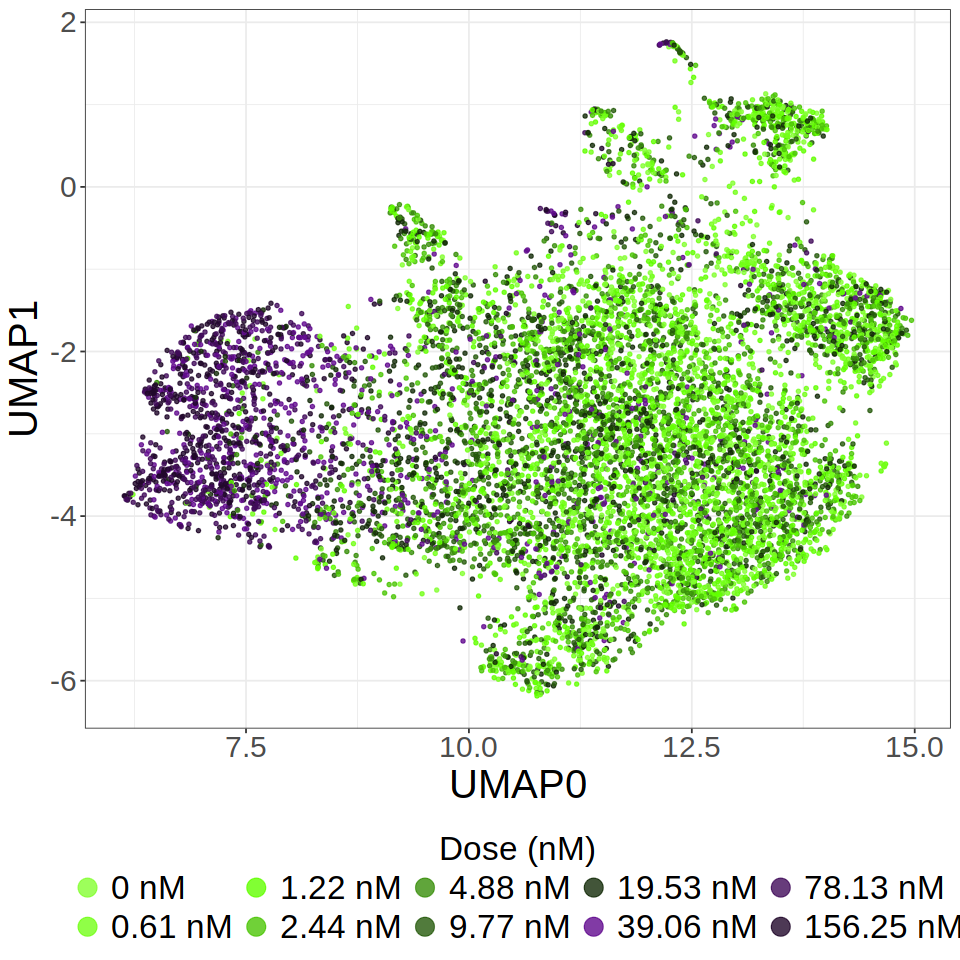

In [6]:
# make a ggplot of the umap
width <- 8
height <- 8
options(repr.plot.width = width, repr.plot.height = height)
umap_plot <- (
    ggplot(data = umap_df, aes(x = UMAP0, y = UMAP1, color = Metadata_dose))
    + geom_point(size = 0.9, alpha = 0.8)
    + theme_bw()
    
    + labs( x = "UMAP0", y = "UMAP1")
    + theme(
        strip.text.x = element_text(size = 18),
        strip.text.y = element_text(size = 18),
        axis.text.x = element_text(size = 18),
        axis.text.y = element_text(size = 18),
        axis.title.x = element_text(size = 24),
        axis.title.y = element_text(size = 24),
        legend.title = element_text(size = 20),
        legend.text = element_text(size = 20),
        legend.position = "bottom",
        legend.box = "horizontal",
    
        
        )
    + scale_color_manual(values = color_pallete_for_dose)
    + guides(
        color = guide_legend(
            override.aes = list(size = 5),
            title = "Dose (nM)",
            title.position = "top",
            title.hjust = 0.5,
            # make them horizontal
            nrow = 2,

        )
    )

    
)
umap_plot
# save  
ggsave(paste0("../figures/",data_mode,"/umap_plot_dose.png"), plot = umap_plot, width = width, height = height, dpi = 600)